# Diamonds

Loaded the attached data into a pandas dataframe: diamonds.csv
This dataset contains the price of diamonds based on various attributes.

Created a bar chart that shows the frequency of diamonds grouped by cut and a scatterplot that shows the relationship between carat and price.

Calculated the Pearson Correlation coefficient of carat and price and created a boxplots that shows the distributions of prices based on the quality of the cut.

Used a 2-sample t-test (with alpha set to 5%) to determine if there is a statistical difference between the price of diamonds with a cut that is considered:

'Good' vs 'Very Good'

'Premium' vs 'Ideal'


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [9]:
relative_path = 'diamonds.csv'
diamonds_df = pd.read_csv(relative_path)

In [18]:
carat = diamonds_df['carat']
print(carat.describe())
print('The mean carat in this datafram is', round(carat.mean(), ndigits=6), "with a standard deviation of", round(carat.std(), ndigits=6))

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64
The mean carat in this datafram is 0.79794 with a standard deviation of 0.474011


In [24]:
price = diamonds_df['price']
print(price.describe())
print('The mean price in this datafram is', round(price.mean(), ndigits=2), "with a standard deviation of", round(price.std(), ndigits=2))

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64
The mean price in this datafram is 3932.8 with a standard deviation of 3989.44


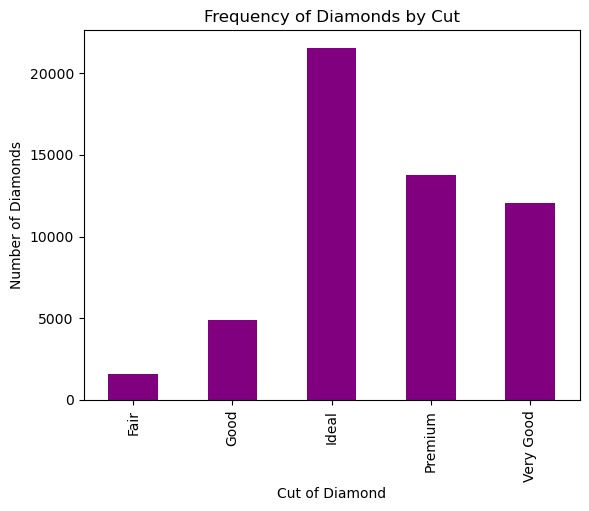

This bar chart shows that there is a frequent pattern of diamonds being of higher quality (eg. Ideal, Premium, Very Good) over lesser quality (eg. Fair, Good).


In [37]:
group_by_cut = diamonds_df.groupby('cut').size()
group_by_cut.plot(kind='bar', color='purple')
plt.title("Frequency of Diamonds by Cut")
plt.xlabel('Cut of Diamond')
plt.ylabel('Number of Diamonds')
plt.show()
print('This bar chart shows that there is a frequent pattern of diamonds being of higher quality (eg. Ideal, Premium, Very Good) over lesser quality (eg. Fair, Good).')

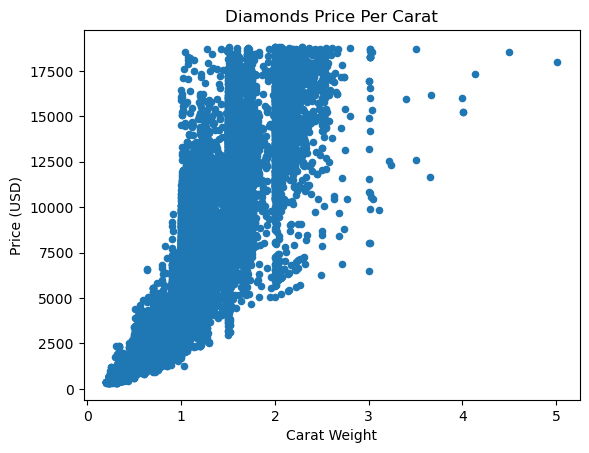

The relationship between carat and price seems to have a positive correlation, however the price data tends to get scattered as the diamond reaches past 1 carat.


In [46]:
diamonds_df.plot(x='carat', y='price', kind='scatter')
plt.title('Diamonds Price Per Carat')
plt.xlabel('Carat Weight')
plt.ylabel('Price (USD)')
plt.show()
print('The relationship between carat and price seems to have a positive correlation, however the price data tends to get scattered as the diamond reaches past 1 carat.')

In [82]:
corr, p_value = stats.pearsonr(diamonds_df['carat'], diamonds_df['price'])
print('Carat and price of diamonds have a strong positive correlation of', corr, 'and a p-value of', p_value, 'indicating that there is indeed an',
      'upward correlation between carat and price and the p-value indicates by how it is 0 that there is realistically no chance that this data appeared like this by random nature.')


Carat and price of diamonds have a strong positive correlation of 0.9215913011935642 and a p-value of 0.0 indicating that there is indeed an upward correlation between carat and price and the p-value indicates by how it is 0 that there is realistically no chance that this data appeared like this by random nature.


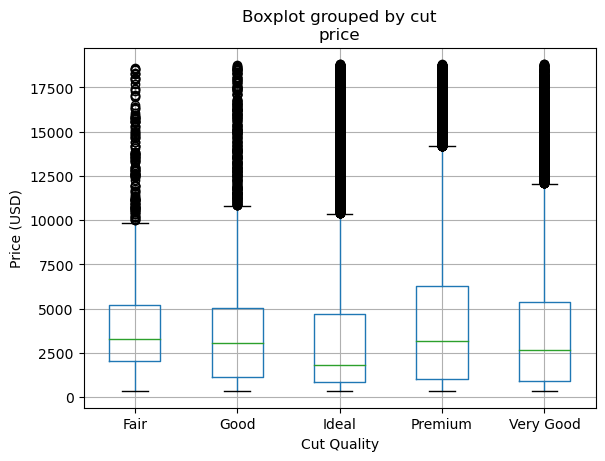

These boxplots all exhibit a pretty substantial amount of left skew. In each of the plots, the median is significtly closer to the first quartile mark than it is the third. There is also a much bigger margin in the last quartitle, and that is especially extended by the outliers. This all indicates that the carats have a left skew by price, meaning that the majority of the diamonds are less expensive in their respective categories, and more expensive diamonds are fewer and far between.


In [78]:
diamonds_df.boxplot(column='price', by='cut')
plt.xlabel('Cut Quality')
plt.ylabel('Price (USD)')
plt.show()
print('These boxplots all exhibit a pretty substantial amount of left skew. In each of the plots, the median is significtly closer to the first quartile mark than it is the third.',
      'There is also a much bigger margin in the last quartitle, and that is especially extended by the outliers. This all indicates that the carats have a left skew by price,',
      'meaning that the majority of the diamonds are less expensive in their respective categories, and more expensive diamonds are fewer and far between.')

In [104]:
good_price = diamonds_df[diamonds_df['cut'] == 'Good']['price']
very_good_price = diamonds_df[diamonds_df['cut'] == 'Very Good']['price']
premium_price = diamonds_df[diamonds_df['cut'] == 'Premium']['price']
ideal_price = diamonds_df[diamonds_df['cut'] == 'Ideal']['price']

alpha = 0.05

t_stat_good_vs_very_good, p_value_good_vs_very_good = stats.ttest_ind(a=good_price, b=very_good_price)
if p_value_good_vs_very_good < alpha:
    print("There is a statistically significant difference between 'Good' and 'Very Good' cuts.")
else:
    print("There is no statistically significant difference between 'Good' and 'Very Good' cuts.")

t_stat_premium_vs_ideal, p_value_premium_vs_ideal = stats.ttest_ind(a=good_price, b=very_good_price)
if p_value_premium_vs_ideal < alpha:
    print("There is a statistically significant difference between 'Premium' and 'Ideal' cuts.")
else:
    print("There is no statistically significant difference between 'Premium' and 'Ideal' cuts.")

There is no statistically significant difference between 'Good' and 'Very Good' cuts.
There is no statistically significant difference between 'Premium' and 'Ideal' cuts.
